In [0]:
# %cd /content/drive/My Drive/Colab Notebooks/oureclecticmind/data/
# !wget https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip
# !unzip -q cell_images.zip -d new

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
dataset = "/content/drive/My Drive/Colab Notebooks/oureclecticmind/cell_images/"
Parasitized = dataset+"Parasitized/"
Uninfected = dataset+"Uninfected/"

In [5]:
print(os.listdir(dataset))

['Parasitized', 'Uninfected', 'model.h5']


In [6]:
parasitized_data = os.listdir(Parasitized)
print(parasitized_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir(Uninfected)
print('\n')
print(uninfected_data[:10])

['C100P61ThinF_IMG_20150918_145938_cell_167.png', 'C109P70ThinF_IMG_20150930_103113_cell_161.png', 'C101P62ThinF_IMG_20150918_151507_cell_50.png', 'C101P62ThinF_IMG_20150923_170344_cell_78.png', 'C101P62ThinF_IMG_20150923_165215_cell_4.png', 'C102P63ThinF_IMG_20150918_163054_cell_167.png', 'C101P62ThinF_IMG_20150918_151942_cell_71.png', 'C101P62ThinF_IMG_20150918_151149_cell_81.png', 'C101P62ThinF_IMG_20150918_151149_cell_80.png', 'C107P68ThinF_IMG_20150924_222233_cell_154.png']


['C12NThinF_IMG_20150614_124244_cell_229.png', 'C12NThinF_IMG_20150614_124301_cell_44.png', 'C12NThinF_IMG_20150614_124212_cell_111.png', 'C12NThinF_IMG_20150614_125703_cell_2.png', 'C12NThinF_IMG_20150614_125703_cell_32.png', 'C12NThinF_IMG_20150614_124301_cell_122.png', 'C12NThinF_IMG_20150614_125741_cell_101.png', 'C12NThinF_IMG_20150614_124212_cell_138.png', 'C12NThinF_IMG_20150614_124212_cell_200.png', 'C12NThinF_IMG_20150614_125703_cell_116.png']


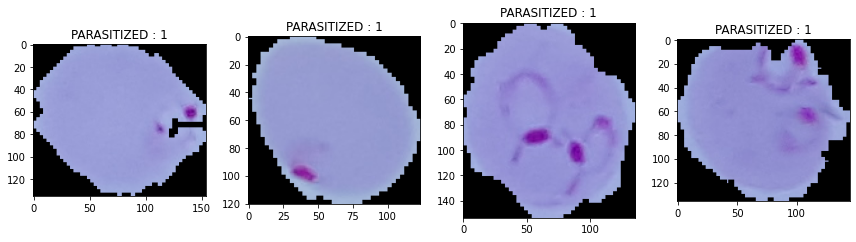

In [7]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(Parasitized + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

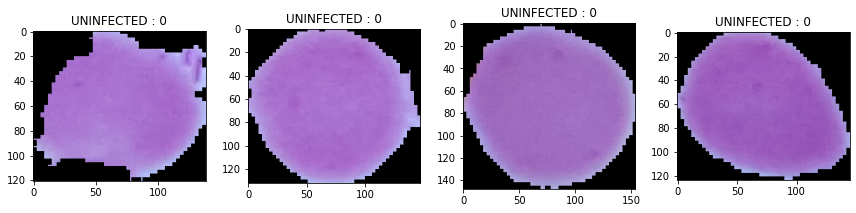

In [8]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(Uninfected + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

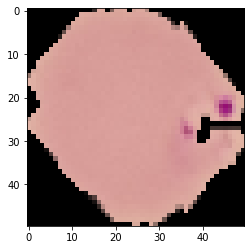

In [9]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread(Parasitized + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread(Uninfected + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

plt.imshow(data[0])
plt.show()

In [0]:
image_data = np.array(data)
labels = np.array(labels)

In [0]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [0]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [14]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (1727, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (432, 50, 50, 3)
SHAPE OF TRAINING LABELS : (1727, 2)
SHAPE OF TESTING LABELS : (432, 2)


In [0]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

In [0]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [17]:
height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 32)       

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [19]:
h = model.fit(x_train, y_train, epochs = 20, batch_size = 32)


Epoch 1/20
1727/1727 [==============================] - 3s 1ms/step - loss: 0.8158 - accuracy: 0.7348
Epoch 2/20
1727/1727 [==============================] - 0s 279us/step - loss: 0.4852 - accuracy: 0.8246
Epoch 3/20
1727/1727 [==============================] - 0s 273us/step - loss: 0.3963 - accuracy: 0.8477
Epoch 4/20
1727/1727 [==============================] - 0s 276us/step - loss: 0.3867 - accuracy: 0.8639
Epoch 5/20
1727/1727 [==============================] - 0s 275us/step - loss: 0.3046 - accuracy: 0.8738
Epoch 6/20
1727/1727 [==============================] - 0s 265us/step - loss: 0.3406 - accuracy: 0.8720
Epoch 7/20
1727/1727 [==============================] - 0s 276us/step - loss: 0.2960 - accuracy: 0.8836
Epoch 8/20
1727/1727 [==============================] - 0s 266us/step - loss: 0.2719 - accuracy: 0.8946
Epoch 9/20
1727/1727 [==============================] - 0s 288us/step - loss: 0.2661 - accuracy: 0.8929
Epoch 10/20
1727/1727 [==============================] - 0s 276us/

In [0]:
model.save(dataset+"model1.h5")

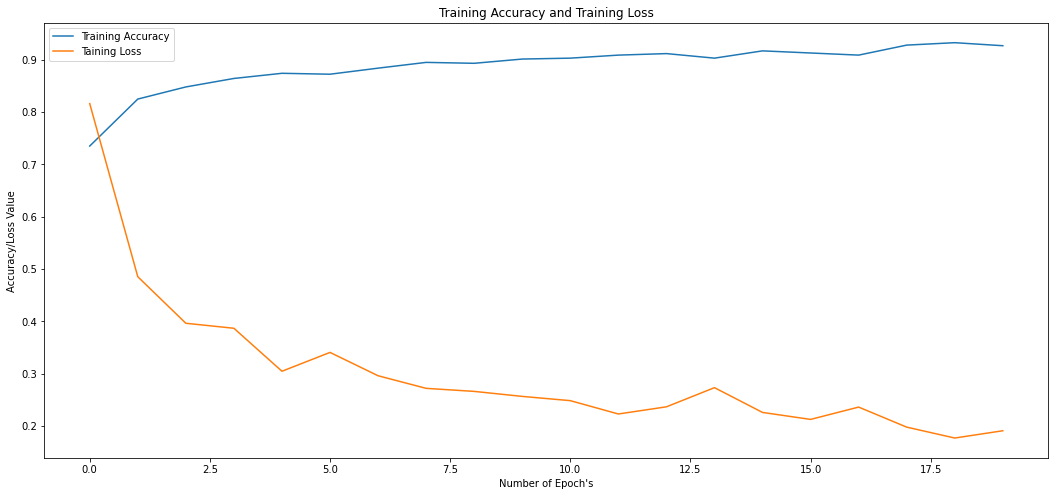

In [21]:
plt.figure(figsize = (18,8))
plt.plot(range(20), h.history['accuracy'], label = 'Training Accuracy')
plt.plot(range(20), h.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

In [22]:
predictions = model.evaluate(x_test, y_test)


432/432 [==============================] - 0s 384us/step


In [23]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

LOSS : 0.23347580543270818
ACCURACY : 0.9004629850387573


In [0]:
from keras.preprocessing.image import ImageDataGenerator


In [0]:
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen = ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow(x_train, y_train, batch_size = 64, shuffle = False)
val_generator = val_datagen.flow(x_test, y_test, batch_size = 64, shuffle = False)

In [0]:
model_aug = CNNbuild(height = height, width = width, classes = classes, channels = channels)

In [0]:
optim = optimizers.Adam(lr = 0.001, decay = 0.001 / 64)
model_aug.compile(loss = 'categorical_crossentropy', optimizer = optim, metrics = ['accuracy'])

In [28]:
h_aug = model_aug.fit_generator(train_generator, steps_per_epoch = len(x_train) // 64, epochs = 50)

Epoch 1/50
26/26 [==============================] - 1s 55ms/step - loss: 1.0602 - accuracy: 0.6398
Epoch 2/50
26/26 [==============================] - 1s 49ms/step - loss: 0.7997 - accuracy: 0.7114
Epoch 3/50
26/26 [==============================] - 1s 47ms/step - loss: 0.6836 - accuracy: 0.7342
Epoch 4/50
26/26 [==============================] - 1s 50ms/step - loss: 0.6244 - accuracy: 0.7354
Epoch 5/50
26/26 [==============================] - 1s 50ms/step - loss: 0.5805 - accuracy: 0.7637
Epoch 6/50
26/26 [==============================] - 1s 47ms/step - loss: 0.5175 - accuracy: 0.7829
Epoch 7/50
26/26 [==============================] - 1s 49ms/step - loss: 0.4494 - accuracy: 0.8197
Epoch 8/50
26/26 [==============================] - 1s 49ms/step - loss: 0.4561 - accuracy: 0.8130
Epoch 9/50
26/26 [==============================] - 1s 46ms/step - loss: 0.4406 - accuracy: 0.8214
Epoch 10/50
26/26 [==============================] - 1s 46ms/step - loss: 0.3929 - accuracy: 0.8466
Epoch 11/

In [0]:
predict = model_aug.evaluate_generator(val_generator, steps = 5)


In [0]:
model_aug.save(dataset+"model.h5")

In [31]:
print(f'LOSS ON TEST DATA AFTER DATA AUGMENTATION : {predict[0]}')
print(f'ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : {predict[1]}')

LOSS ON TEST DATA AFTER DATA AUGMENTATION : 0.6066122055053711
ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : 0.715624988079071


In [0]:
import numpy as np
from keras.preprocessing import image
from PIL import Image, ImageFont, ImageDraw

In [0]:
from keras.models import load_model
save_model = load_model(dataset+"model.h5")


In [0]:
# test_image = plt.imread(Parasitized+'C100P61ThinF_IMG_20150918_144104_cell_162.png')
# img_resize = cv2.resize(test_image, (50, 50))
# test_image = image.img_to_array(img_resize)
# test_image = np.expand_dims(test_image, axis = 0)
# result = save_model.predict(test_image)
# print(result)



# test_image2 = plt.imread(Uninfected+'C12NThinF_IMG_20150614_124212_cell_111.png')
# img_resize2 = cv2.resize(test_image2, (50, 50))
# test_image2 = image.img_to_array(img_resize2)
# test_image2 = np.expand_dims(test_image2, axis = 0)
# result2 = save_model.predict(test_image2)
# print(result2)

In [0]:
# model_aug.predict(test_image)
# y_proba = save_model.predict_classes(test_image)
# y_proba

In [0]:
from keras.models import load_model
from PIL import Image
from PIL import Image
import numpy as np
import os
import cv2
def convert_to_array(img):
    im = cv2.imread(img)
    img_ = Image.fromarray(im, 'RGB')
    image = img_.resize((50, 50))
    return np.array(image)
def get_cell_name(label):
    if label==0:
        return "Paracitized"
    if label==1:
        return "Uninfected"
def predict_cell(file):
    model = load_model(dataset+"model.h5")
    print("Predicting Type of Cell Image.................................")
    ar=convert_to_array(file)
    ar=ar/255
    label=1
    a=[]
    a.append(ar)
    a=np.array(a)
    score=model.predict(a,verbose=1)
    print(score)
    label_index=np.argmax(score)
    print(label_index)
    acc=np.max(score)
    Cell=get_cell_name(label_index)
    return Cell,"The predicted Cell is a "+Cell+" with accuracy =    "+str(acc)

In [0]:
test_image1 = Parasitized+'C100P61ThinF_IMG_20150918_144104_cell_162.png'
test_image2 = Parasitized+'C100P61ThinF_IMG_20150918_144104_cell_168.png'
test_image3 = Uninfected+'C12NThinF_IMG_20150614_124244_cell_229.png'
test_image4 = Uninfected+'C1_thinF_IMG_20150604_104942_cell_59.png'



In [38]:
predict_cell(test_image1)

Predicting Type of Cell Image.................................
1/1 [==============================] - 0s 93ms/step
[[1. 0.]]
0


('Paracitized', 'The predicted Cell is a Paracitized with accuracy =    1.0')

In [39]:
predict_cell(test_image2)

Predicting Type of Cell Image.................................
1/1 [==============================] - 0s 85ms/step
[[1. 0.]]
0


('Paracitized', 'The predicted Cell is a Paracitized with accuracy =    1.0')

In [40]:
predict_cell(test_image3)

Predicting Type of Cell Image.................................
1/1 [==============================] - 0s 80ms/step
[[1. 0.]]
0


('Paracitized', 'The predicted Cell is a Paracitized with accuracy =    1.0')

In [41]:
predict_cell(test_image4)

Predicting Type of Cell Image.................................
1/1 [==============================] - 0s 80ms/step
[[1. 0.]]
0


('Paracitized', 'The predicted Cell is a Paracitized with accuracy =    1.0')

In [45]:
test_image5 = "/content/drive/My Drive/C100P61ThinF_IMG_20150918_145938_cell_172.png"
predict_cell(test_image5)

Predicting Type of Cell Image.................................
1/1 [==============================] - 0s 92ms/step
[[1. 0.]]
0


('Paracitized', 'The predicted Cell is a Paracitized with accuracy =    1.0')

In [0]:
/content/drive/My Drive/C100P61ThinF_IMG_20150918_145938_cell_172.png